# i. Perkenalan

Nama : Satriya Fauzan Adhim

Batch : FTDS-019-RMT

Obyektif : Memanfaatkan Machine Learning guna memprediksi klasisifikasi dari tamu hotel yang mereservasi kamar apakah ia akan mencancel reservasinya atau tidak. Sehingga dapat meminimalisir pengaruh dari adanya cancelation tersebut. 

# ii. Import Libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import pickle, joblib
import json

# iii. Data Loading

In [109]:
data = pd.read_csv("h8dsft_P1M2_Satriya_Fauzan_Adhim.csv")

data.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.tail(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36265,INN36266,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36266,INN36267,2,0,2,2,Meal Plan 1,0,Room_Type 2,8,2018,3,4,Online,0,0,0,85.96,1,Canceled
36267,INN36268,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled
36269,INN36270,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [6]:
data.shape

(36275, 19)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

# iv. Exploratory Data Analysis (EDA)

In [8]:
# Mengcopy dataset

df = data.copy()

## Mengecek Duplikasi Data

In [9]:
df.duplicated().sum()

0

Tidak terdapat data yang terduplikasi.

## Missing Value

In [102]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [11]:
# Melihat daftar kolom
kolom = df.columns.tolist()

# Menampilkan daftar kolom
print(kolom)

['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


## Statistik Deskriptif

In [12]:
# Statistik Deskriptif
print(df.describe())

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights   
count  36275.000000    36275.000000          36275.000000       36275.000000  \
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month   
count                36275.000000  36275.000000  36275.000000   36275.000000  \
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     8

## Nilai Unik Pada Kolom

In [13]:
# Menghitung jumlah nilai unik untuk setiap kolom
unique_counts = df.nunique()

# Menampilkan hasil
print(unique_counts)

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64


### Visualization

[Text(0.5, 1.0, 'Booking Status')]

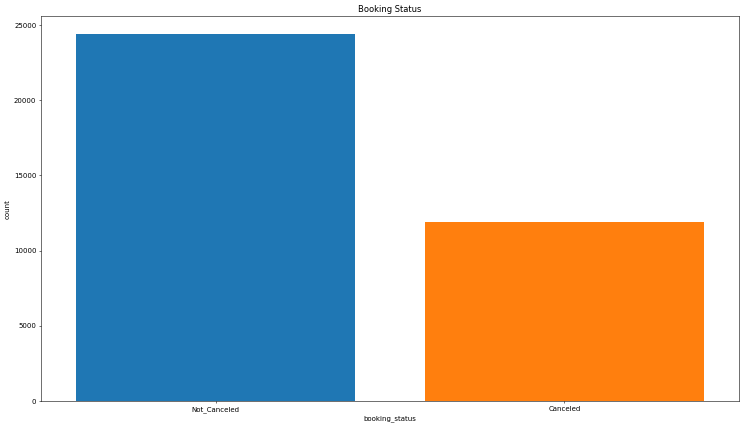

In [14]:
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

sns.barplot(x = df["booking_status"].value_counts().index,
            y = df["booking_status"].value_counts(),
            data = df,
            saturation = 1).set(title = "Booking Status")

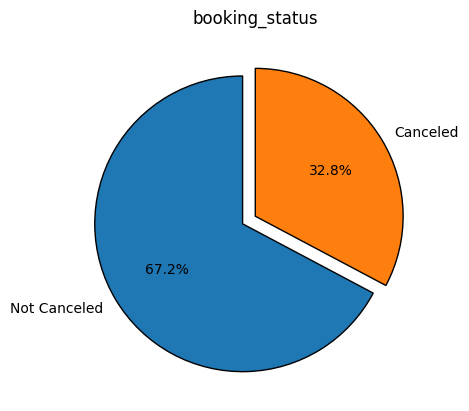

In [15]:
l = list(df['booking_status'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

plt.pie(circle,labels = ['Not Canceled','Canceled'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('booking_status')

plt.show()

Diagram diatas merupakan visualisasi dari data target. Terlihat distribusi data target adalah 67.2% berbanding 32.8%. Diasumsikan distribusi data tersebut masih balance, karena diasumsikan data yang mulai imbalance adalah data dengan proporsi 70:30.
Berdasarkan jumlah tamu yang mencancel bookingnya terhadap hotel, dapat dilihat bahwa jumlahnya cukup banyak. Hal tersebut dapat membuat kerugian pada hotel apabila tidak ditanggulangi dan diatur dalam sistem booking yang baik.

<Axes: title={'center': 'Variable arrival_year'}, xlabel='arrival_year', ylabel='count'>

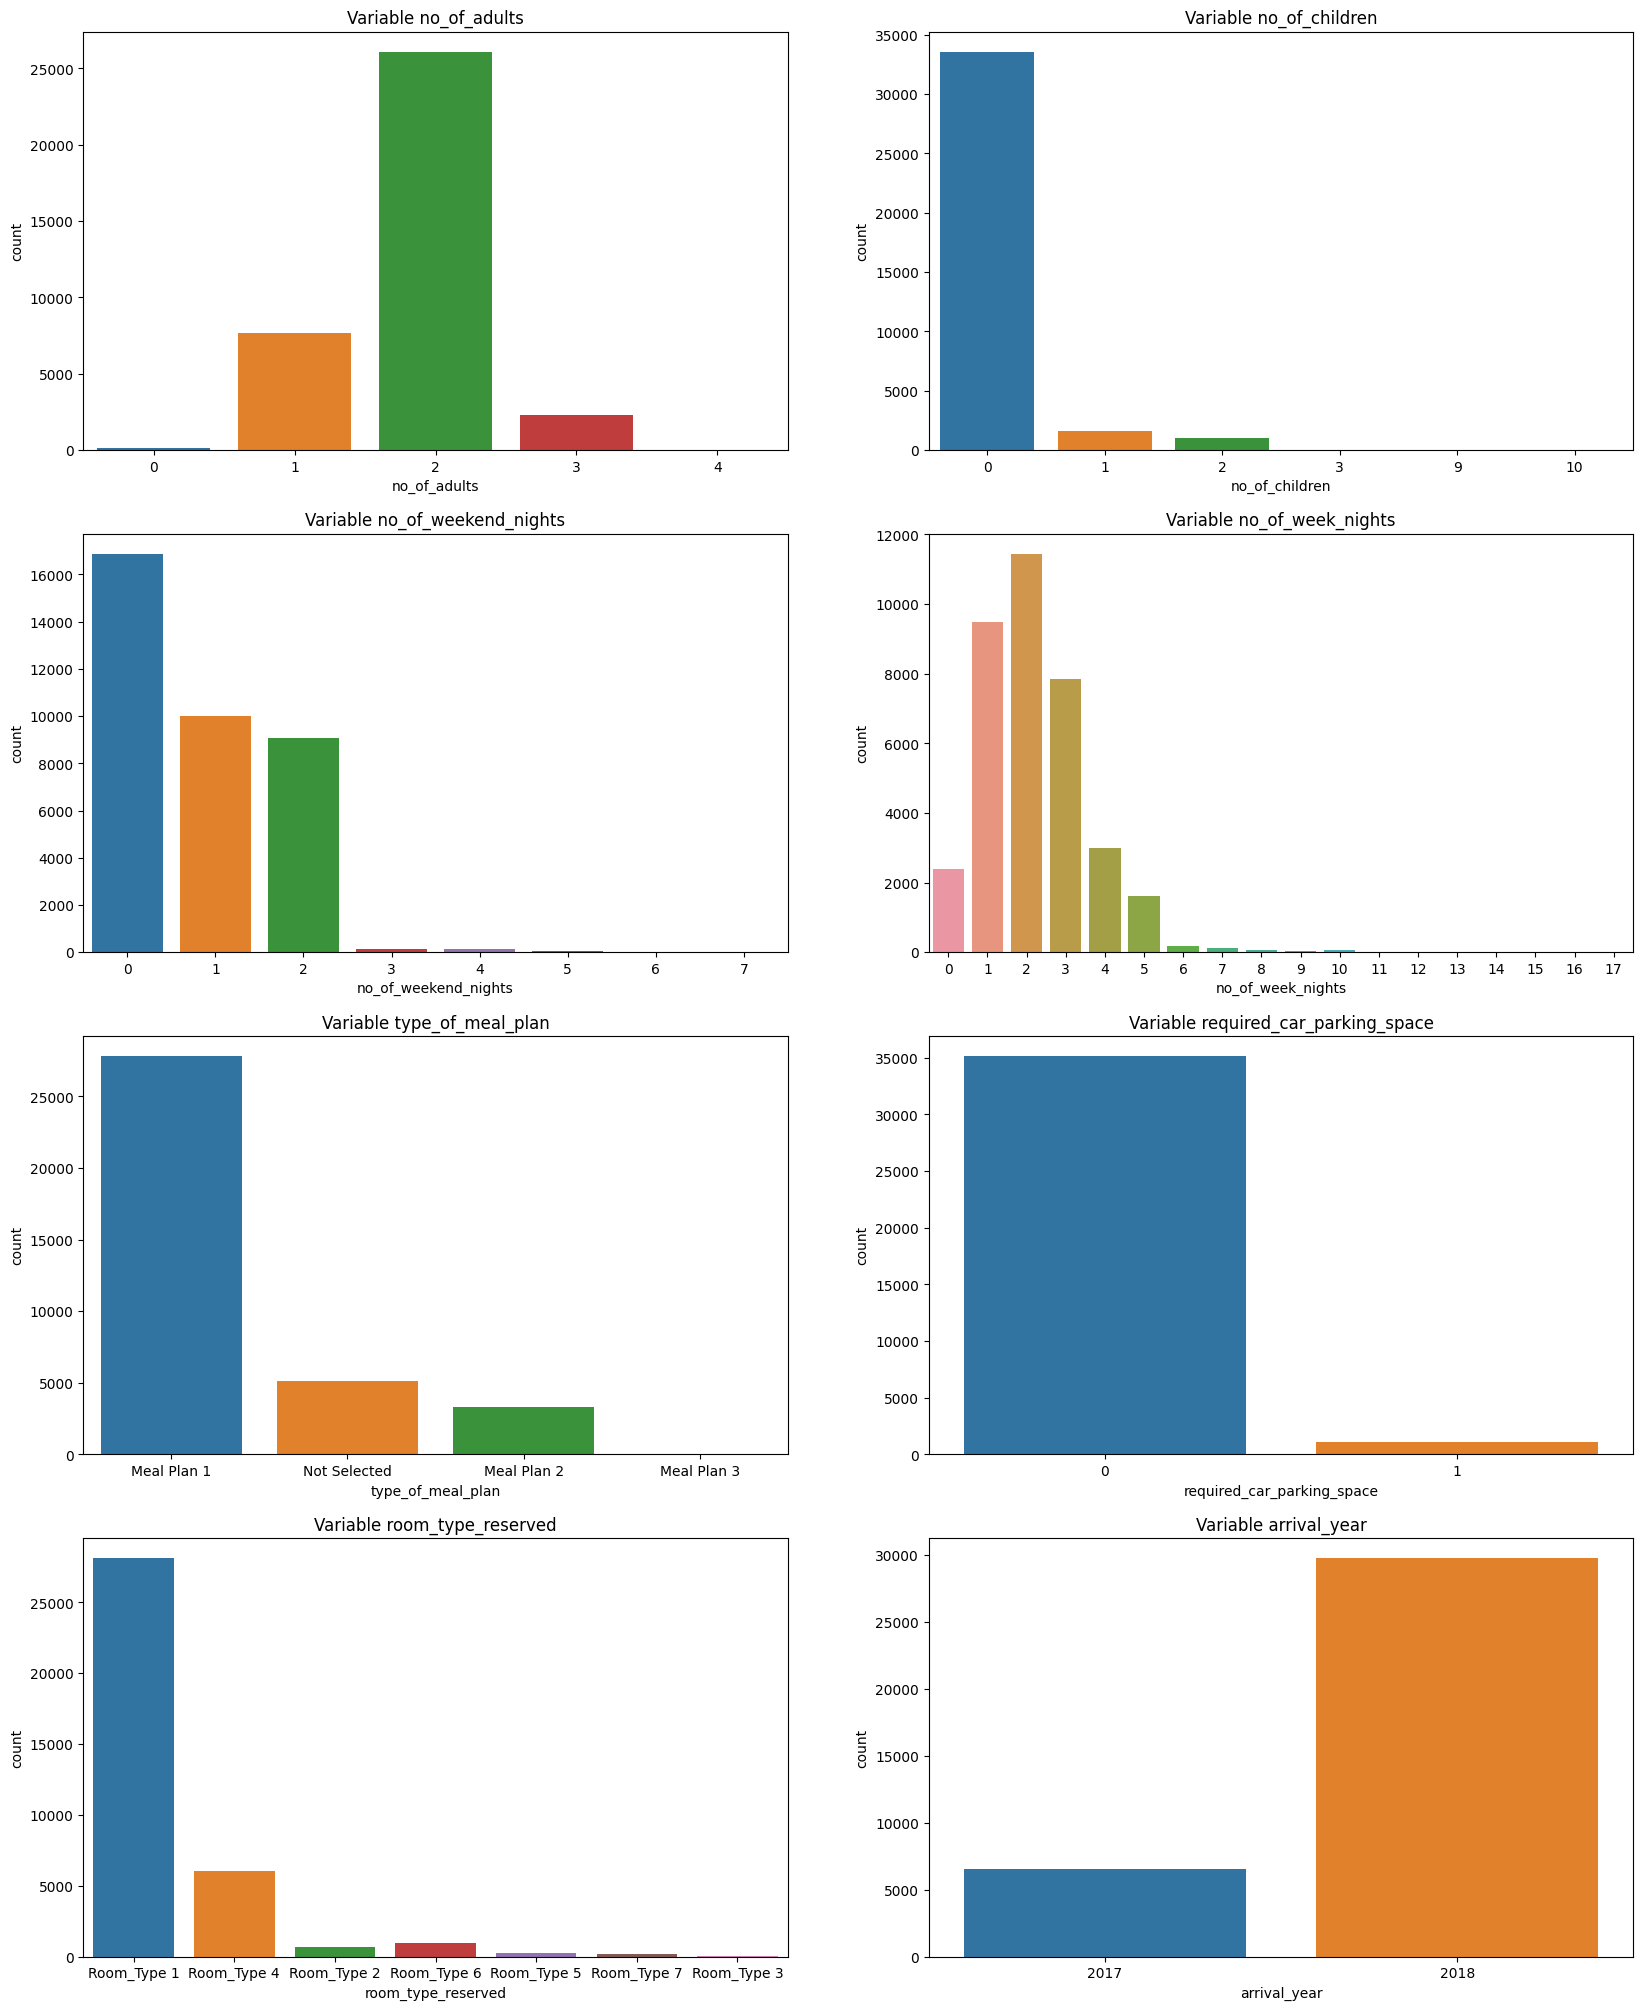

In [92]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', data = df)

Visualisasi data diatas merupakan visualisasi data terkait dengan data kategorikal yang ada dalam dataset. Berdasarkan visualisasi tersebut dapat diketahui bahwa room tipe 1 merupakan kamar paling favorit di hotel untuk reservasi. Sebagian besar pelanggan yang mereservasi hotel hanya terdiri dari orang dewasa saja dengan waktu inap yang tidak panjang. Untuk makanan yang mendominasi pada data adalah makanan paket meal_plan_1, dengan mengetahui banyaknya yang memesan makanan ini maka stok makanan ini membutuhkan perhatian khusus agar dapat disesuaikan dengan pemesanan yang akan ada. 

<Axes: title={'center': 'Variable no_of_special_requests'}, xlabel='no_of_special_requests', ylabel='count'>

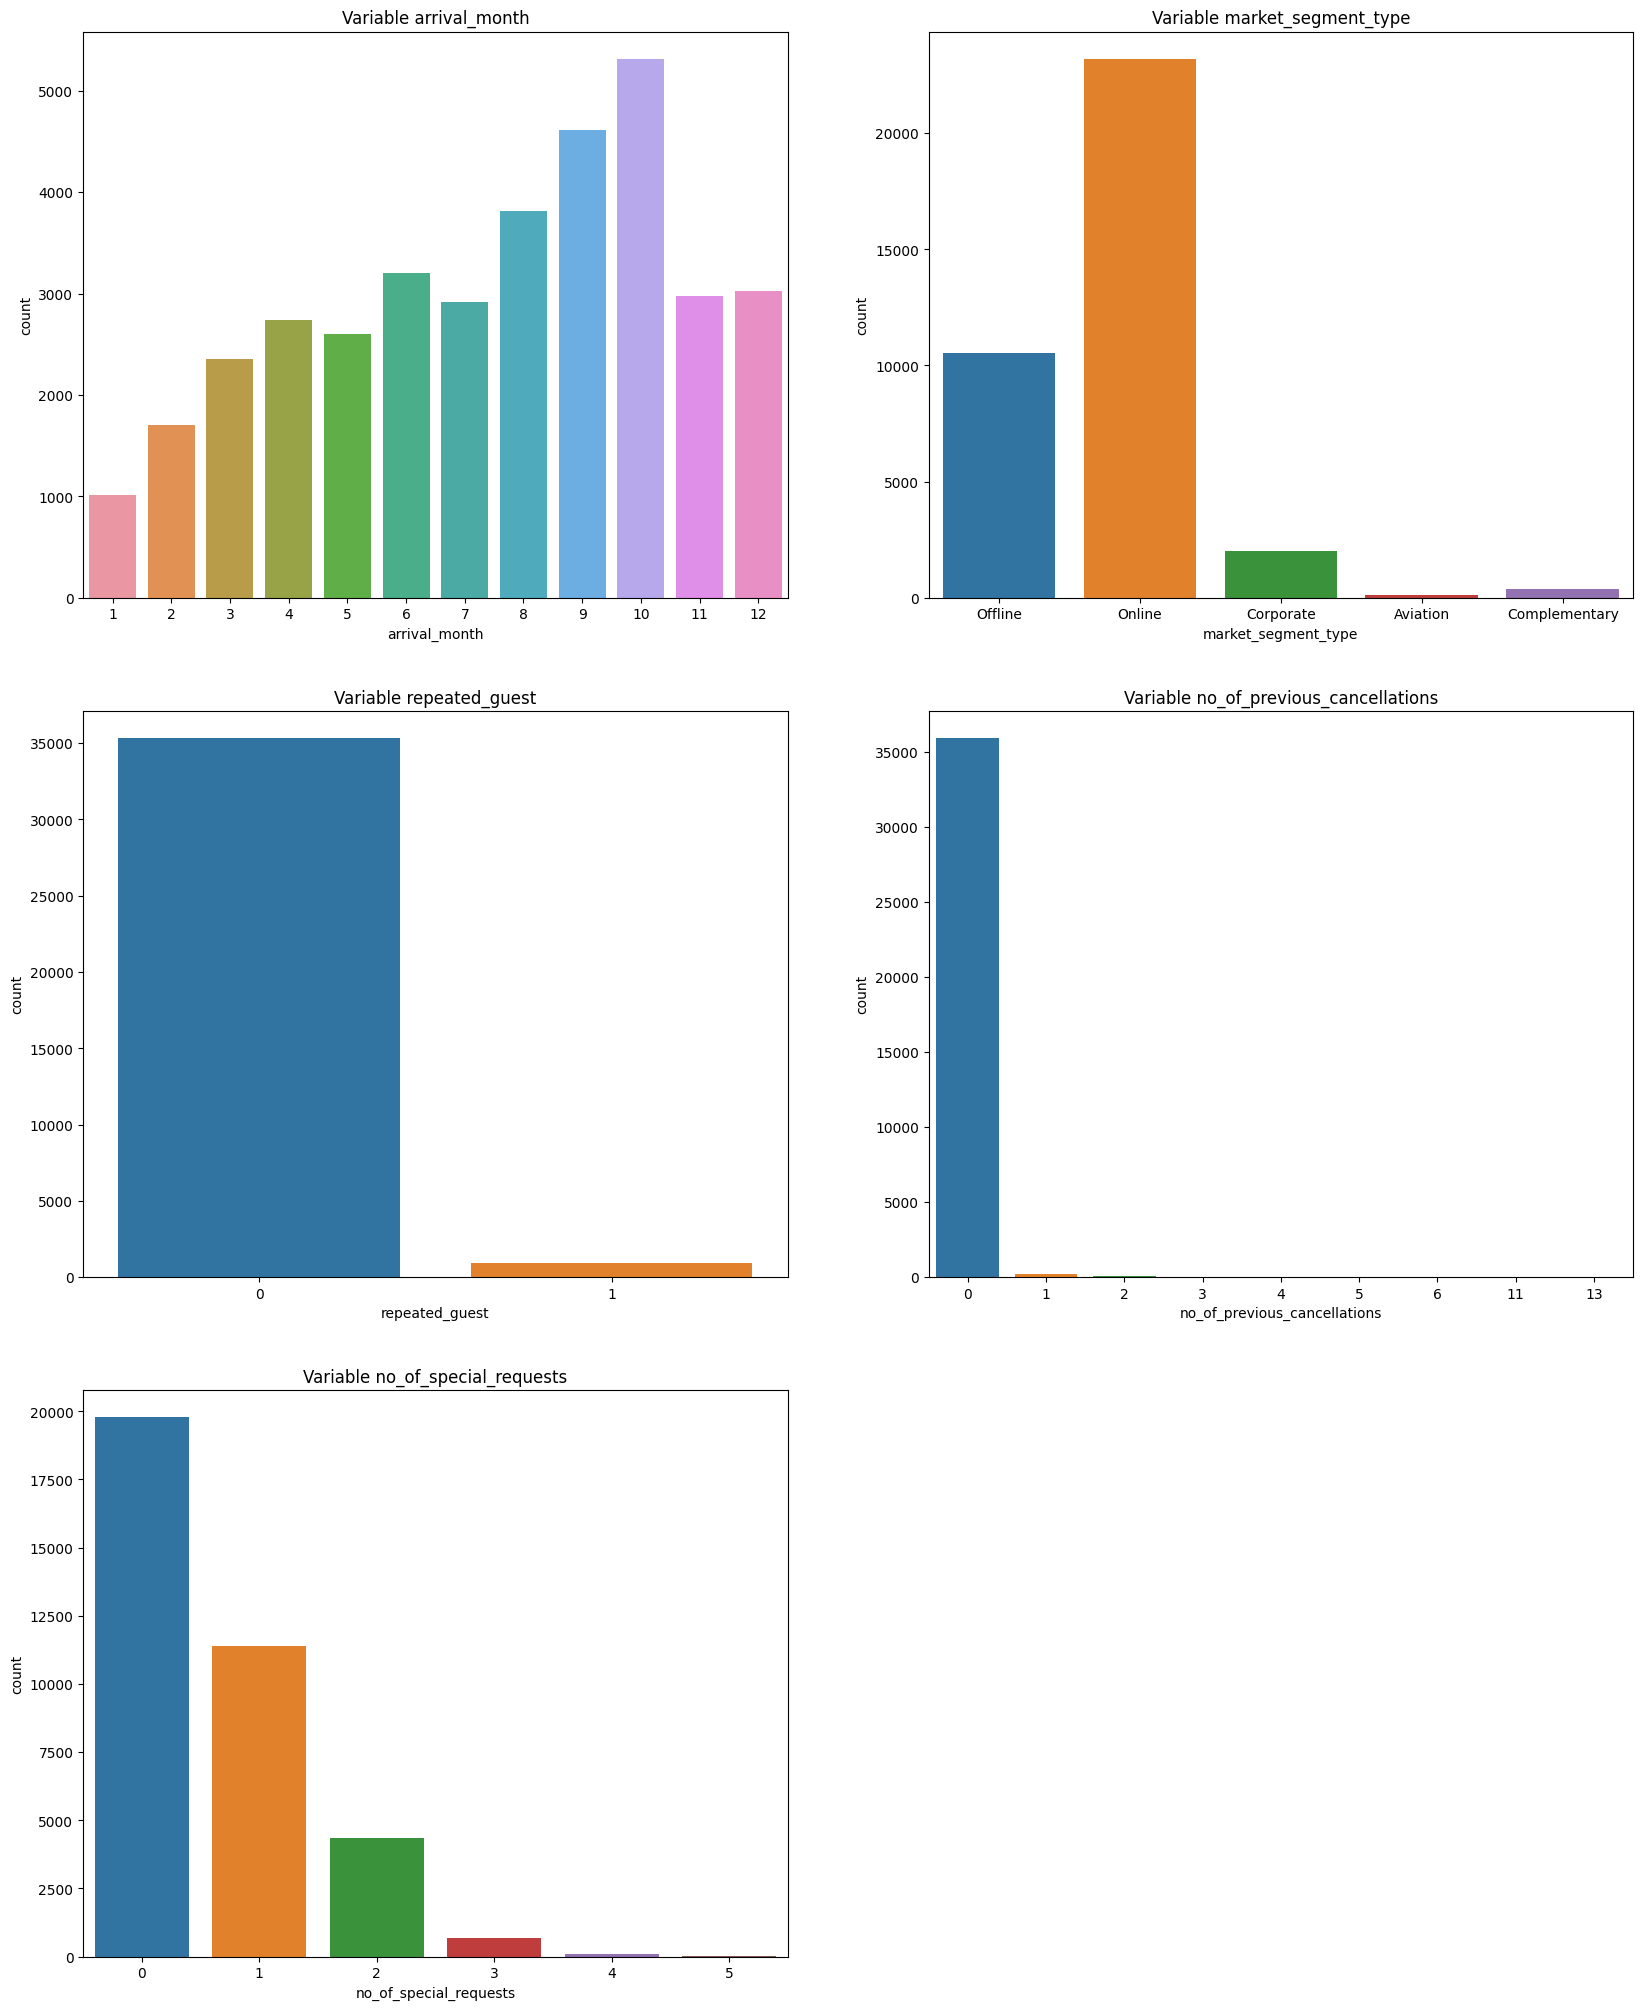

In [94]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', data = df)

plt.subplot(3,2,2)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x = 'market_segment_type', data = df)

plt.subplot(3,2,3)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', data = df)

plt.subplot(3,2,4)
plt.gca().set_title('Variable no_of_previous_cancellations')
sns.countplot(x = 'no_of_previous_cancellations', data = df)

plt.subplot(3,2,5)
plt.gca().set_title('Variable no_of_special_requests')
sns.countplot(x = 'no_of_special_requests', data = df)

Berdasarkan visualisasi di atas, dapat dilihat bahwa adanya jumlah tamu yang mendominasi di bulan 9 dan 10 serta penurunan tamu pada akhir tahun yaitu di bulan 11 dan 12. Pemesanan hotel didominasi dengan pemesanan online, dengan mengetahui hal ini pihak manajemen dapat memberikan benefit lebih kepada tamu yang memesan online dan juga lebih memerhatikan sistem pemesanan online agar tidak terjadi masalah. 

# v. Feature Engineering

In [16]:
# Melihat daftar kolom
kolom = df.columns.tolist()

# Menampilkan daftar kolom
print(kolom)

['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


In [17]:
drop = ['Booking_ID','arrival_year','arrival_month','arrival_date', ]
df1 = df.drop(drop, axis=1)

In [18]:
df1

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled


In [19]:
correlation_matrix = phik_matrix(df1)

print(correlation_matrix)

interval columns not set, guessing: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
                                      no_of_adults  no_of_children   
no_of_adults                              1.000000        0.273063  \
no_of_children                            0.273063        1.000000   
no_of_weekend_nights                      0.112024        0.031775   
no_of_week_nights                         0.179085        0.031248   
type_of_meal_plan                         0.109799        0.079600   
required_car_parking_space                0.015031        0.048916   
room_type_reserved                        0.474895        0.545671   
lead_time                                 0.230938        0.056791   
market_segment_type                       0.485912        0.121383   
rep

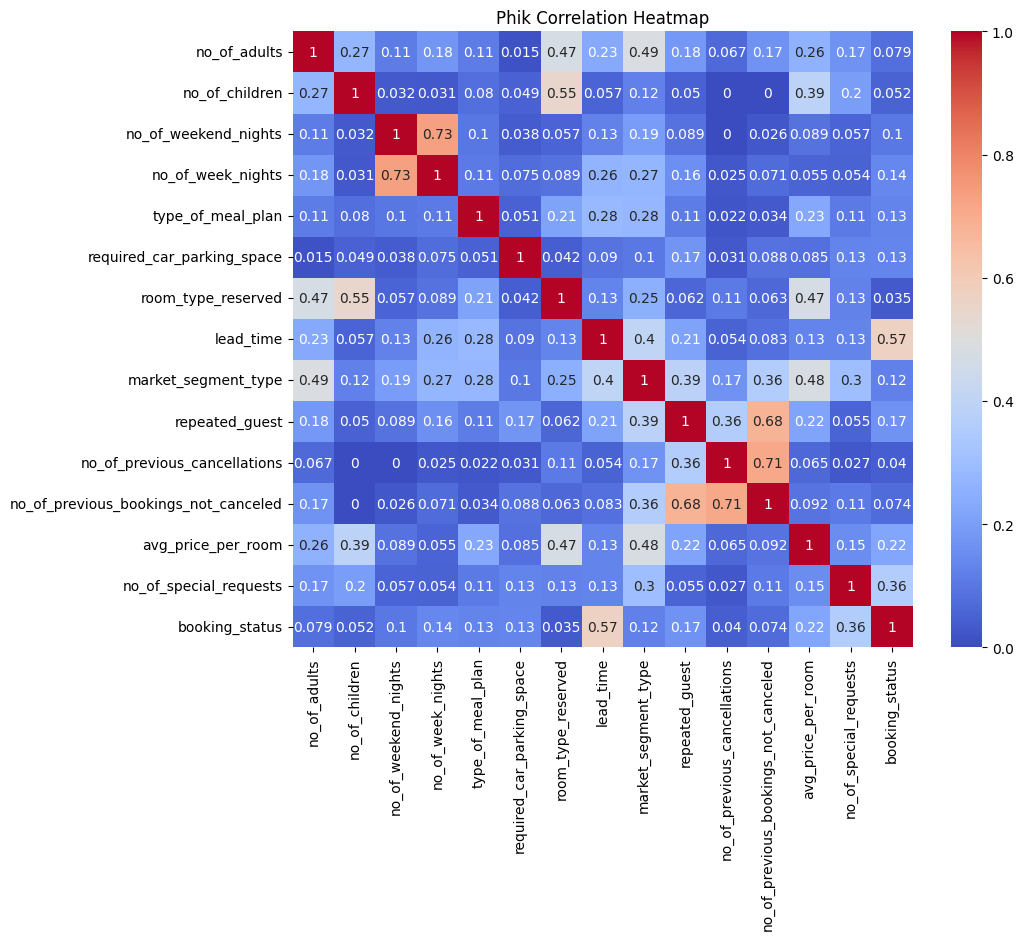

In [20]:
# Membuat heatmap dari correlation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Phik Correlation Heatmap')
plt.show()

Berdasarkan hasil analisis korelasi di atas, dapat dilihat korelasi dengan menggunakan phik antara semua variabel yang ada. Phik digunakan untuk memudahkan dalam melihat korelasi karena dapat mengukur korelasi antara kategorik dan numerical. Berdasarkan nilai korelasi tersebut maka diputuskan bahwa feature yang akan digunakan adalah sebagai berikut.
1. lead_time (0.57)
2. no_of_special_requests (0.36)
3. avg_price_per_room (0.22)
4. repeated_guest (0.17)
5. no_of_week_nights (0.14)

In [21]:
dff = df1[['lead_time', 'no_of_special_requests', 'avg_price_per_room','repeated_guest', 'no_of_week_nights', 'booking_status']]

### VIF

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
# Ambil hanya variabel prediktor yang dipilih
X = df[['lead_time', 'no_of_special_requests', 'avg_price_per_room','repeated_guest', 'no_of_week_nights']]

# Hitung VIF untuk setiap variabel prediktor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                 Variable       VIF
0               lead_time  1.911156
1  no_of_special_requests  1.689333
2      avg_price_per_room  3.646034
3          repeated_guest  1.014716
4       no_of_week_nights  3.064638


Nilai VIF tidak ada yang diatas 5. Maka disimpulkan semua feature yang telah dipilih ini dapat digunakan dalam pemodelan.

## Memisahkan variabel target  dan feature 

In [24]:
# Memisahkan `X` and `y`

X = dff.drop(['booking_status'], axis=1)
y = dff['booking_status']
X

,lead_time,no_of_special_requests,avg_price_per_room,repeated_guest,no_of_week_nights
0,224,0,65.00,0,2
1,5,1,106.68,0,3
2,1,0,60.00,0,1
3,211,0,100.00,0,2
4,48,0,94.50,0,1
...,...,...,...,...,...
36270,85,1,167.80,0,6
36271,228,2,90.95,0,3
36272,148,2,98.39,0,6
36273,63,0,94.50,0,3


## Memisahkan antara Train-Set and Test-Set

In [25]:
# Memisahkan Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (29020, 5)
Test Size  :  (7255, 5)


,lead_time,no_of_special_requests,avg_price_per_room,repeated_guest,no_of_week_nights
33091,154,0,80.75,0,4
4056,58,1,93.60,0,2
33930,180,1,100.00,0,1
16884,180,2,100.08,0,2
34666,17,0,97.00,0,3
...,...,...,...,...,...
31044,17,1,87.00,0,1
25631,0,0,95.10,0,2
33174,1,0,79.00,0,1
34959,63,0,168.30,0,3


## Handling Outlier

### Melihat Jumlah Outlier

In [26]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [27]:
def find_normal_boundaries(df, var):
    upper_boundary = df[var].mean() + 3 * df[var].std()
    lower_boundary = df[var].mean() - 3 * df[var].std()

    return upper_boundary, lower_boundary

In [28]:
def percentage_outlier(df, var):
  
  outlier_right_tail=(len(df[df[var] > upper_boundary]) / len(df) * 100)
  outlier_left_tail= (len(df[df[var] < lower_boundary]) / len(df) * 100)
  return outlier_right_tail, outlier_left_tail

### Jumlah outliers lead_time

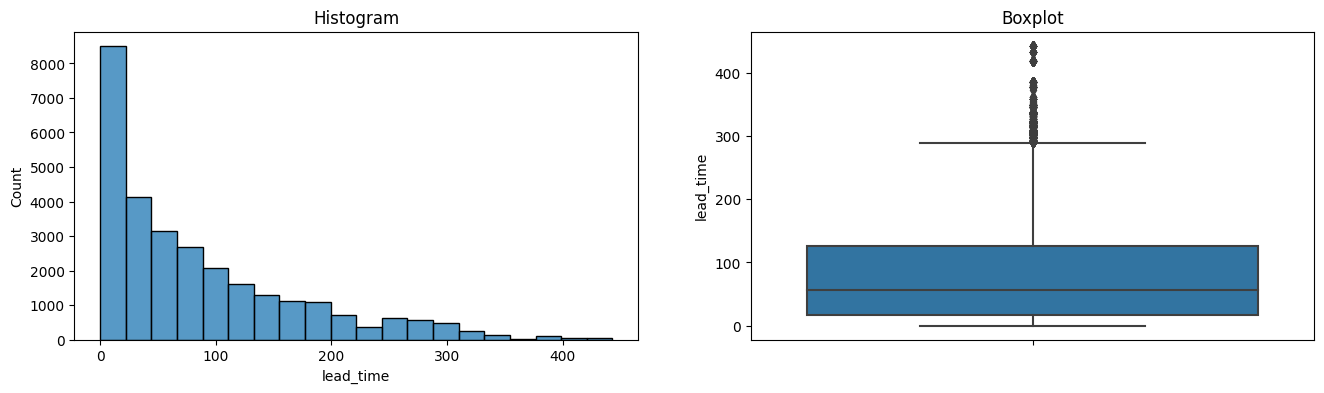


Skewness Value :  1.2908111407270357
% right end outliers : 1.0199862164024809
% left end outliers  : 0.0
distribusi skewed


In [29]:
diagnostic_plots(X_train, 'lead_time')
print('\nSkewness Value : ', X_train['lead_time'].skew())

upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'lead_time')
upper_boundary, lower_boundary

print(f"% right end outliers : {percentage_outlier(X_train,'lead_time')[0]}")
print(f"% left end outliers  : {percentage_outlier(X_train,'lead_time')[1]}")

if (X_train['lead_time'].skew() >= -0.5 ) | (X_train['lead_time'].skew() <= 0.5 ) :
      print('distribusi skewed')
else:
      print('distribusi normal')

In [30]:
index_outlier1= X_train.query('lead_time > @upper_boundary').index.tolist()
print(index_outlier1)

[199, 19310, 28085, 23749, 15874, 21271, 21294, 25377, 25512, 1808, 14266, 9770, 19763, 23846, 35656, 22548, 27478, 22593, 12282, 7376, 16263, 19898, 3939, 28630, 6415, 7866, 2552, 24099, 17745, 3692, 2818, 2045, 27625, 27954, 8619, 12831, 2057, 17211, 4161, 14959, 23204, 18297, 3963, 20619, 4954, 13645, 24299, 32217, 2833, 6746, 23608, 11814, 10305, 12625, 4960, 15358, 28563, 1721, 10528, 3839, 19375, 8378, 24062, 7175, 4111, 18944, 15350, 19954, 34911, 5692, 3004, 35081, 2592, 22655, 19787, 26117, 19078, 3373, 16382, 1881, 15319, 20203, 8463, 3328, 30309, 26503, 15681, 6695, 36006, 31202, 17528, 22613, 36178, 21863, 34073, 6594, 5659, 14261, 1931, 25291, 24446, 35488, 16463, 26609, 32103, 7274, 17180, 34417, 35630, 18088, 22652, 25772, 25658, 12728, 15940, 14429, 3609, 27173, 28315, 31575, 13919, 29450, 24734, 23195, 26545, 29455, 27786, 28983, 27097, 11066, 2279, 11223, 8346, 8687, 2105, 29318, 20786, 17970, 27300, 12604, 34238, 15812, 31061, 418, 32618, 963, 20918, 9543, 18054, 312

### Jumlah outliers avg_price_per_room

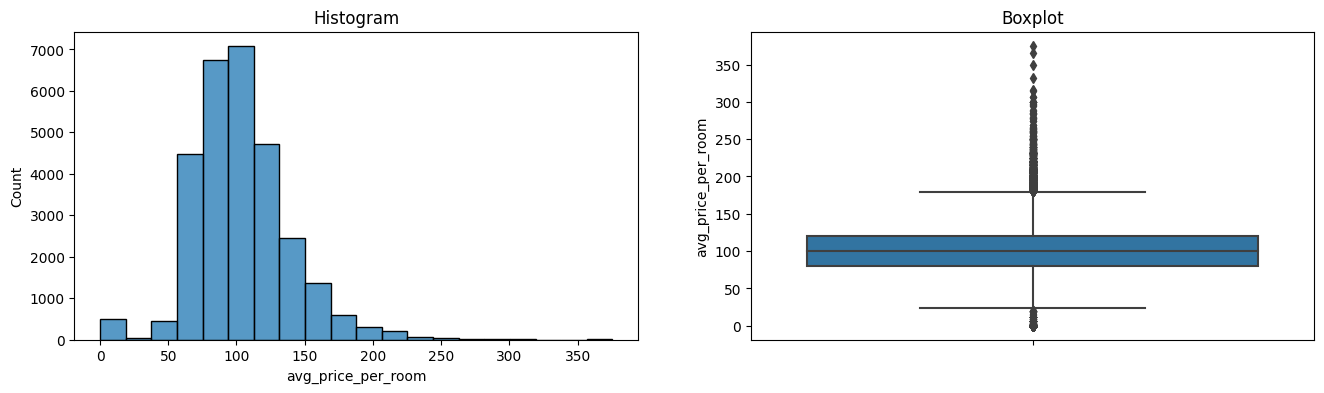


Skewness Value :  0.642929210918598
% right end outliers : 1.0027567195037905
% left end outliers  : 0.0
distribusi skewed


In [31]:
diagnostic_plots(X_train, 'avg_price_per_room')
print('\nSkewness Value : ', X_train['avg_price_per_room'].skew())

upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'avg_price_per_room')
upper_boundary, lower_boundary

print(f"% right end outliers : {percentage_outlier(X_train,'avg_price_per_room')[0]}")
print(f"% left end outliers  : {percentage_outlier(X_train,'avg_price_per_room')[1]}")

if (X_train['avg_price_per_room'].skew() >= -0.5 ) | (X_train['avg_price_per_room'].skew() <= 0.5 ) :
      print('distribusi skewed')
else:
      print('distribusi normal')

In [32]:
index_outlier3= X_train.query('lead_time > @upper_boundary').index.tolist()
print(index_outlier3)

[24383, 32449, 22799, 10599, 9525, 17041, 2348, 14699, 199, 12225, 19169, 28273, 25913, 19310, 21944, 32546, 28085, 32008, 21044, 23749, 18863, 18469, 1753, 6772, 16999, 6806, 8946, 6184, 4412, 3871, 20526, 10758, 6595, 32442, 14845, 27598, 11022, 24407, 21354, 34223, 188, 465, 11006, 28897, 35169, 11849, 31464, 18943, 30362, 27708, 15874, 35932, 19685, 29900, 18983, 10002, 21271, 15344, 15037, 33390, 4025, 674, 7852, 21983, 19143, 34114, 12510, 9708, 28123, 17498, 19822, 32478, 30141, 10123, 21370, 25546, 14215, 25911, 21294, 6887, 5429, 14005, 11772, 4508, 22039, 9034, 5768, 25748, 18162, 4202, 35790, 19535, 3532, 25377, 19869, 25512, 17220, 13255, 1808, 17165, 5137, 14266, 20872, 7065, 13408, 16203, 32874, 20112, 27091, 25856, 32027, 33442, 34397, 6736, 35605, 28316, 18211, 32544, 15799, 13764, 31994, 32057, 8859, 16166, 18839, 1530, 2150, 7811, 33947, 7725, 21889, 21794, 24675, 28545, 32385, 17155, 1882, 12923, 3338, 9770, 9862, 12572, 732, 6190, 18989, 34962, 29412, 32313, 19763, 

### Jumlah outliers no_of_week_nights

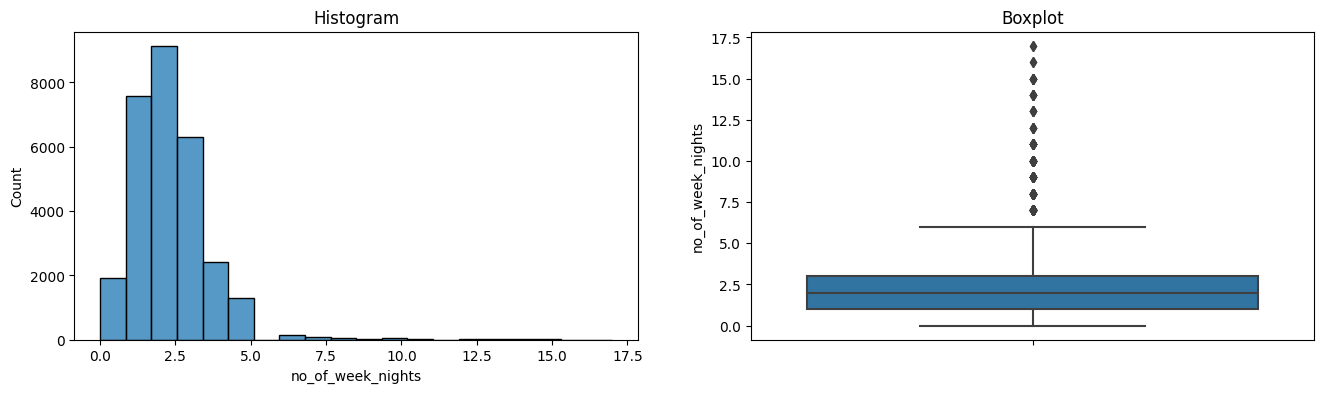


Skewness Value :  1.624109290744548
% right end outliers : 0.8787043418332184
% left end outliers  : 0.0
distribusi skewed


In [33]:
diagnostic_plots(X_train, 'no_of_week_nights')
print('\nSkewness Value : ', X_train['no_of_week_nights'].skew())

upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'no_of_week_nights')
upper_boundary, lower_boundary

print(f"% right end outliers : {percentage_outlier(X_train,'no_of_week_nights')[0]}")
print(f"% left end outliers  : {percentage_outlier(X_train,'no_of_week_nights')[1]}")

if (X_train['no_of_week_nights'].skew() >= -0.5 ) | (X_train['no_of_week_nights'].skew() <= 0.5 ) :
      print('distribusi skewed')
else:
      print('distribusi normal')

In [34]:
index_outlier4= X_train.query('lead_time > @upper_boundary').index.tolist()
print(index_outlier4)

[33091, 4056, 33930, 16884, 34666, 239, 10266, 32205, 3264, 7564, 27110, 1340, 16068, 35934, 24438, 4384, 2110, 32941, 5379, 10790, 34809, 25096, 27433, 24383, 5449, 15864, 35569, 32449, 3222, 13278, 28650, 9452, 6382, 13163, 10479, 24179, 28387, 20061, 22799, 35177, 29820, 16733, 23759, 3857, 10599, 23332, 7045, 19237, 17933, 22213, 9524, 28290, 9923, 27733, 33910, 29231, 20975, 35839, 9525, 21015, 13718, 17041, 2348, 14699, 35117, 22270, 22877, 27112, 199, 11132, 36121, 19175, 34113, 24663, 18446, 19653, 22843, 12225, 19169, 4406, 28273, 25913, 4804, 24219, 6319, 14414, 19310, 35684, 21944, 8855, 33190, 20074, 4403, 22176, 32546, 28085, 28626, 16391, 24167, 3173, 32008, 19622, 31944, 22346, 21044, 23749, 18863, 12114, 15095, 18469, 27289, 33508, 7505, 9733, 20271, 29432, 23219, 1334, 1910, 2765, 8263, 23327, 6013, 1941, 6792, 24542, 9779, 31377, 22804, 1753, 2071, 16846, 9630, 2973, 834, 17663, 24695, 3715, 12561, 32810, 13464, 4433, 31384, 1192, 6772, 11859, 31346, 15653, 31826, 246

### Jumlah outliers total

In [35]:
all_indexes =  index_outlier1 + index_outlier3 + index_outlier4
unique_indexes = set(all_indexes)

In [36]:
jumlah_unique_indexes = len(unique_indexes)
print("Jumlah unique_indexes:", jumlah_unique_indexes)

Jumlah unique_indexes: 24710


In [37]:
print('Persentase Outliers : ', ((jumlah_unique_indexes/36275)*100), '%')

Persentase Outliers :  68.118538938663 %


Dengan presentase outliers di dalam data sebesar 8.6% maka dipilih untuk melakukan imputasi kepada outliers yang ada.

### Imputasi outliers

In [38]:
num_col = X_train[['lead_time', 'avg_price_per_room', 'no_of_week_nights']]
cat_col = X_train[['no_of_special_requests', 'repeated_guest']]

In [39]:
for col in num_col.columns: 
  skewness = num_col[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = num_col[col].mean() + 3*num_col[col].std()
    lower = num_col[col].mean() - 3*num_col[col].std()
  elif skewness>=-1 and skewness<=1:
    Q1 = num_col[col].quantile(0.25)
    Q3 = num_col[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR    
  else:
    Q1 = num_col[col].quantile(0.25)
    Q3 = num_col[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 3*IQR
    lower = Q1 - 3*IQR
  
  no_outliers = num_col[(num_col[col]>=lower) & (num_col[col]<=upper)]
  outliers = num_col[(num_col[col]<lower) | (num_col[col]>upper)]


In [40]:
no_outliers

,lead_time,avg_price_per_room,no_of_week_nights
33091,154,80.75,4
4056,58,93.60,2
33930,180,100.00,1
16884,180,100.08,2
34666,17,97.00,3
...,...,...,...
31044,17,87.00,1
25631,0,95.10,2
33174,1,79.00,1
34959,63,168.30,3


In [41]:
len(outliers)/len(num_col)

0.003273604410751206

In [42]:
cat_col.drop(list(outliers.index),inplace=True)
y_train.drop(list(outliers.index),inplace=True)

C:\Users\SatriyaFzn\AppData\Local\Temp\ipykernel_12104\2414966197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_col.drop(list(outliers.index),inplace=True)


## Handling Missing Value

In [43]:
# memeriksa missing values

dff.isnull().sum()

lead_time                 0
no_of_special_requests    0
avg_price_per_room        0
repeated_guest            0
no_of_week_nights         0
booking_status            0
dtype: int64

Tidak terdapat missing value pada dataset yang digunakan dalam pemodelan.

## Split between Numerical Columns and Categorical Columns

In [44]:
# Menghitung jumlah nilai unik untuk setiap kolom
unique_counts = X_train.nunique()

# Menampilkan hasil
print(unique_counts)

lead_time                  348
no_of_special_requests       6
avg_price_per_room        3476
repeated_guest               2
no_of_week_nights           18
dtype: int64


In [45]:
num_columns = num_col.columns.tolist()
cat_columns = cat_col.columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['lead_time', 'avg_price_per_room', 'no_of_week_nights']
Cat Columns :  ['no_of_special_requests', 'repeated_guest']


In [46]:
# membagi train set dan test set berdasarkan jenis cat dan num

X_train_num = no_outliers
X_test_num = X_test[num_columns]

X_train_cat = cat_col
X_test_cat = X_test[cat_columns]

X_train_num

,lead_time,avg_price_per_room,no_of_week_nights
33091,154,80.75,4
4056,58,93.60,2
33930,180,100.00,1
16884,180,100.08,2
34666,17,97.00,3
...,...,...,...
31044,17,87.00,1
25631,0,95.10,2
33174,1,79.00,1
34959,63,168.30,3


## Feature Scaling

In [47]:
# Display `X_train_num`

X_train_num

,lead_time,avg_price_per_room,no_of_week_nights
33091,154,80.75,4
4056,58,93.60,2
33930,180,100.00,1
16884,180,100.08,2
34666,17,97.00,3
...,...,...,...
31044,17,87.00,1
25631,0,95.10,2
33174,1,79.00,1
34959,63,168.30,3


In [48]:
X_train_num.describe()

,lead_time,avg_price_per_room,no_of_week_nights
count,28925.000000,28925.000000,28925.000000
mean,85.299983,103.390446,2.174555
std,86.123175,35.207076,1.307242
min,0.000000,0.000000,0.000000
25%,17.000000,80.260000,1.000000
50%,57.000000,99.450000,2.000000
75%,126.000000,120.000000,3.000000
max,443.000000,375.500000,9.000000


In [49]:
# Featue Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.3476298 , 0.2150466 , 0.44444444],
       [0.13092551, 0.24926764, 0.22222222],
       [0.40632054, 0.26631158, 0.11111111],
       ...,
       [0.00225734, 0.21038615, 0.11111111],
       [0.14221219, 0.4482024 , 0.33333333],
       [0.4221219 , 0.32703063, 0.22222222]])

## Feature Encoding

Feature Encoding yang dilakukan hanya kepada variabel target, karena data kategorikal yang butuh untuk di encode hanya pada varibel target. Encoding yang dilakukan menggunakan label encoding, karena pada variabel target hanya berisi dua nilai kategorik sehingga label encoding efektif untuk digunakan.

In [50]:
print(y_train)

33091    Not_Canceled
4056     Not_Canceled
33930    Not_Canceled
16884        Canceled
34666        Canceled
             ...     
31044    Not_Canceled
25631    Not_Canceled
33174    Not_Canceled
34959    Not_Canceled
10863        Canceled
Name: booking_status, Length: 28925, dtype: object


In [51]:
# Konversi Series menjadi DataFrame
y_train_df = pd.DataFrame({'booking_status': y_train})
y_test_df = pd.DataFrame({'booking_status': y_test})

In [52]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train_df['booking_status'])
y_test = encoder.transform(y_test_df['booking_status'])


In [53]:
# Konversi Series menjadi DataFrame
y_train_df = pd.DataFrame({'booking_status': y_train})
y_test_df = pd.DataFrame({'booking_status': y_test})

## Concate antara Numerical Columns dan Categorical Columns

In [54]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)
X_train_final

array([[0.3476298 , 0.2150466 , 0.44444444, 0.        , 0.        ],
       [0.13092551, 0.24926764, 0.22222222, 1.        , 0.        ],
       [0.40632054, 0.26631158, 0.11111111, 1.        , 0.        ],
       ...,
       [0.00225734, 0.21038615, 0.11111111, 0.        , 0.        ],
       [0.14221219, 0.4482024 , 0.33333333, 0.        , 0.        ],
       [0.4221219 , 0.32703063, 0.22222222, 2.        , 0.        ]])

In [55]:
# Create DataFrame of `X_train_final`

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,lead_time,avg_price_per_room,no_of_week_nights,no_of_special_requests,repeated_guest
0,0.347630,0.215047,0.444444,0.0,0.0
1,0.130926,0.249268,0.222222,1.0,0.0
2,0.406321,0.266312,0.111111,1.0,0.0
3,0.406321,0.266525,0.222222,2.0,0.0
4,0.038375,0.258322,0.333333,0.0,0.0
...,...,...,...,...,...
28920,0.038375,0.231691,0.111111,1.0,0.0
28921,0.000000,0.253262,0.222222,0.0,0.0
28922,0.002257,0.210386,0.111111,0.0,0.0
28923,0.142212,0.448202,0.333333,0.0,0.0


# vii. Model Definition

In [103]:
# Inisialisasi model Logistic Regression

log_model = LogisticRegression(max_iter=1000000)

In [104]:
# Inisialisasi model using SVM

svm_model = SVC()

In [105]:
# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier()

In [106]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

In [107]:
# Training using KNN

knn_model = KNeighborsClassifier()

In [108]:
# Training using Naive Bayes

nb_model = GaussianNB()

# viii. Model Training

In [68]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)

### Pipeline

In [69]:

pipe1 = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])

pipe2 = Pipeline([("scaler", MinMaxScaler()), ('logreg',LogisticRegression(max_iter=1000000))])

pipe3 = Pipeline([("scaler", MinMaxScaler()), ("dt", DecisionTreeClassifier())])
pipe4 = Pipeline([("scaler", MinMaxScaler()), ("rf", RandomForestClassifier())])
pipe5 = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())])
pipe6 = Pipeline([("scaler", MinMaxScaler()), ("nb", GaussianNB())])




# ix. Model Evaluation

## Cross Validation

In [70]:
# checking cross validation score
cv_svm_model = cross_val_score(pipe1, X_train_final_df, y_train, cv=skfold, scoring="recall")
cv_log_model = cross_val_score(pipe2, X_train_final_df, y_train, cv=skfold, scoring="recall")
cv_dt_model = cross_val_score(dt_model, X_train_final_df, y_train, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rf_model, X_train_final_df, y_train, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(knn_model, X_train_final_df, y_train, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(nb_model, X_train_final_df, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model],['log_model','svm_model','dt_model','rf_model','knn_model','nb_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_model
precision - All - Cross Validation  :  [0.90932443 0.90136142 0.91420498 0.90136142 0.90544707]
precision - Mean - Cross Validation :  0.9063398637077273
precision - Std - Cross Validation  :  0.004922086076546155
precision - Range of Test-Set       :  0.9014177776311811 - 0.9112619497842736
--------------------------------------------------
svm_model
precision - All - Cross Validation  :  [0.92447984 0.91780118 0.92756229 0.92396609 0.9270298 ]
precision - Mean - Cross Validation :  0.9241678412435
precision - Std - Cross Validation  :  0.003475212910591034
precision - Range of Test-Set       :  0.920692628332909 - 0.9276430541540911
--------------------------------------------------
dt_model
precision - All - Cross Validation  :  [0.8692525  0.87798613 0.86334446 0.87233496 0.87384378]
precision - Mean - Cross Validation :  0.8713523680340158
precision - Std - Cross Validation  :  0.004893165896856301
precision - Range of Test-Set       :  0.8664592021371595 - 0.87624553393

Berdasarkan hasil Cross Validation dengan menggunakan metrik recall maka didapati bahwa SVM merupakan model terbaik. Metrik recall digunakan karena dapat menunjukkan seberapa baik model dalam memprediksi kelas canceled secara akurat. Dengan fokus pada kesalahan False Positive, recall yang tinggi akan mengindikasikan bahwa model memprediksi canceled yang benar-benar kelas termasuk kelas canceled.

## HyperParameter Tuning

### GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV

In [80]:
# Create pipeline
pipex = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(max_iter=1000000))])

# Define the parameter grid
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=pipex, param_grid=param_grid, cv=skfold, scoring="recall")

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_final_df, y_train)

# Get the best model and its performance
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
best_params = grid_search.best_params_

# Print the results
print("Best Model:", best_model)
print("Best recall:", best_score)
print("Best Parameters:", best_params)

Best Model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svm', SVC(C=0.1, max_iter=1000000))])
Best recall: 0.9264795774110592
Best Parameters: {'svm__C': 0.1, 'svm__kernel': 'rbf'}


Berdasarkan hasil GridSearcCV maka parameter terbaik yang akan digunakan adalah C = 0.1 dan kernel : rbf. Dengan menggunakan parameter tersebut meningkatkan skor recall yang dihasilkan bila dibandingkan dengan base model.

In [88]:
# Inisiasi dan training pemodelan SVM dengan parameter tuning

model_svm = SVC(C=0.1, kernel='rbf')
model_svm.fit(X_train_final_df, y_train)

SVC(C=0.1)

## Model Evaluation SVM Setelah Parameter Tuning

In [111]:
y_pred_train2 = model_svm.predict(X_train_final_df)
y_pred_test2 = model_svm.predict(X_test_final)

In [112]:
#Train
print('Accuracy  :',accuracy_score(y_train,y_pred_train2))
print('Precision :',precision_score(y_train,y_pred_train2))
print('Recall    :',recall_score(y_train,y_pred_train2))
print('F1 Score  :',f1_score(y_train,y_pred_train2))

Accuracy  : 0.7774243733794296
Precision : 0.7860845119915664
Recall    : 0.9194410193177147
F1 Score  : 0.8475491356855316


In [113]:
#Test
print('Accuracy  :',accuracy_score(y_test,y_pred_test2))
print('Precision :',precision_score(y_test,y_pred_test2))
print('Recall    :',recall_score(y_test,y_pred_test2))
print('F1 Score  :',f1_score(y_test,y_pred_test2))

Accuracy  : 0.7794624396967609
Precision : 0.7914391403910516
Recall    : 0.9152576899572215
F1 Score  : 0.8488569809181937


recall Score - Train Set  :  0.9194410193177147 

Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.49      0.59      9461
           1       0.79      0.92      0.85     19464

    accuracy                           0.78     28925
   macro avg       0.77      0.70      0.72     28925
weighted avg       0.77      0.78      0.76     28925
 

Confusion Matrix      : 


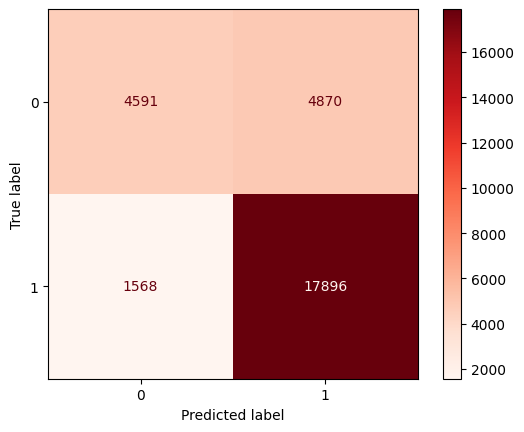

In [117]:
print('recall Score - Train Set  : ', recall_score(y_train, y_pred_train2), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train2), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_svm, X_train_final_df, y_train, cmap='Reds'))

recall Score - Train Set  :  0.9152576899572215 

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.50      0.59      2346
           1       0.79      0.92      0.85      4909

    accuracy                           0.78      7255
   macro avg       0.76      0.71      0.72      7255
weighted avg       0.77      0.78      0.77      7255
 

Confusion Matrix      : 


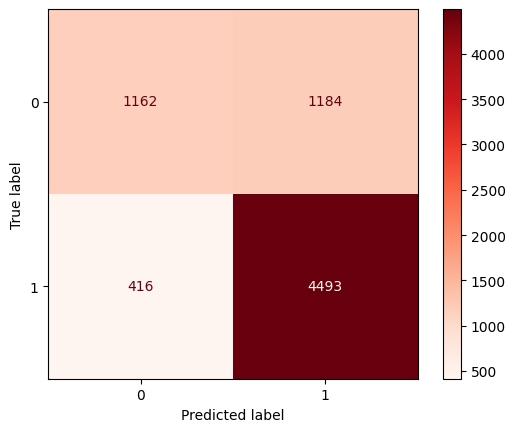

In [118]:
print('recall Score - Train Set  : ', recall_score(y_test, y_pred_test2), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test2), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_svm, X_test_final, y_test, cmap='Reds'))

# x. Model Saving

In [90]:
import random

# Mengambil 20 indeks acak dari DataFrame
random_indices = random.sample(range(len(df)), 20)

# Mengambil 20 data acak dari DataFrame berdasarkan indeks yang dipilih
dfi = df.iloc[random_indices]
dfi = dfi.drop('booking_status', axis = 1)
dfi

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
20039,INN20040,2,0,1,2,Meal Plan 1,0,Room_Type 1,91,2018,3,4,Offline,0,0,0,40.67,0
14197,INN14198,1,0,0,2,Meal Plan 1,0,Room_Type 1,103,2018,4,19,Offline,0,0,0,115.00,0
2062,INN02063,2,0,1,2,Not Selected,0,Room_Type 1,66,2018,9,2,Online,0,0,0,87.30,1
8537,INN08538,3,0,0,4,Meal Plan 1,0,Room_Type 4,84,2018,7,13,Online,0,0,0,137.70,0
5844,INN05845,2,0,2,1,Meal Plan 1,0,Room_Type 1,25,2018,10,8,Offline,0,0,0,85.00,0
26800,INN26801,1,0,2,0,Meal Plan 1,0,Room_Type 1,238,2018,11,13,Offline,0,0,0,55.08,0
11493,INN11494,1,0,0,1,Meal Plan 1,0,Room_Type 4,4,2018,5,20,Corporate,0,0,0,90.00,0
21979,INN21980,2,0,0,2,Meal Plan 1,0,Room_Type 1,151,2018,1,19,Offline,0,0,0,86.50,0
26245,INN26246,2,0,2,1,Meal Plan 1,0,Room_Type 1,99,2017,10,10,Online,0,0,0,89.25,3
11709,INN11710,2,0,1,4,Meal Plan 1,0,Room_Type 1,87,2018,3,30,Online,0,0,0,82.45,1


In [91]:
dfi.to_csv('dfi.csv', index=False)

In [82]:
num_columns

['lead_time', 'avg_price_per_room', 'no_of_week_nights']

In [100]:
cat_columns

['no_of_special_requests', 'repeated_guest']

In [101]:
# Save the Files

#model dan preprocessing
with open('model_svm.pkl', 'wb') as file_1:
  joblib.dump(model_svm, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('list_num_cols.txt', 'w') as file_3:
  json.dump(num_columns, file_3)

with open('list_cat_columns.txt', 'w') as file_4:
  json.dump(cat_columns, file_4)

# xi. Model Inference

Model Inference terdapat pada notebook lain.

# xii. Pengambilan Kesimpulan

Kesimpulan EDA:
1. Distribusi data target adalah 67.2% berbanding 32.8%. Diasumsikan distribusi data tersebut masih balance, karena diasumsikan data yang mulai imbalance adalah data dengan proporsi 70:30.
2. Berdasarkan jumlah tamu yang mencancel bookingnya terhadap hotel, dapat dilihat bahwa jumlahnya cukup banyak. Hal tersebut dapat membuat kerugian pada hotel apabila tidak ditanggulangi dan diatur dalam sistem booking yang baik.
3. Room tipe 1 merupakan kamar paling favorit di hotel untuk reservasi. Sebagian besar pelanggan yang mereservasi hotel hanya terdiri dari orang dewasa saja dengan waktu inap yang tidak panjang. Untuk makanan yang mendominasi pada data adalah makanan paket meal_plan_1, dengan mengetahui banyaknya yang memesan makanan ini maka stok makanan ini membutuhkan perhatian khusus agar dapat disesuaikan dengan pemesanan yang akan ada. 
4. Jumlah tamu yang mendominasi di bulan 9 dan 10 serta penurunan tamu pada akhir tahun yaitu di bulan 11 dan 12. Pemesanan hotel didominasi dengan pemesanan online, dengan mengetahui hal ini pihak manajemen dapat memberikan benefit lebih kepada tamu yang memesan online dan juga lebih memerhatikan sistem pemesanan online agar tidak terjadi masalah. 

Kesimpulan Model Analysis: 
Berdasarkan Model Analysis yang dibuat diputuskan bahwa SVM merupakan pemodelan model Classification yang terbaik untuk memprediksi tamu yang mencancel reservasi serta didapatkan hal-hal berikut terkait dengan model yang digunakan, yaitu:
1. Evaluasi skor permodelan menggunakan recall, digunakan karena dapat menunjukkan seberapa baik model dalam memprediksi kelas canceled secara akurat.
2. Berdasarkan hasil GridSearcCV maka parameter terbaik yang akan digunakan adalah C = 0.1 dan kernel : rbf. Dengan menggunakan parameter tersebut meningkatkan skor recall yang dihasilkan bila dibandingkan dengan base model.
3. Recall akhir pada data test sebesar 0.9152576899572215  menunjukkan bahwa model mampu mengidentifikasi sekitar 91.52% dari total sampel kelas positif yang sebenarnya. Recall pada data train sebesar 0.9194410193177147  menunjukkan bahwa model mampu mengidentifikasi sekitar 91.94% dari total sampel kelas positif yang sebenarnya.

Untuk pemodelan yang dilakukan masih dapat ditingkatkan kembali, khususnya dalam pencarian hyperparameter tuningnya, bisa ditingkatkan jumlah iterationya sehingga mungkin dapat tereksplor hyperparameter yang lebih baik lagi dan dapat meningkatkan kinerja model.